
---

# **🔤  03 - Model Testing: Modern Embedding Approaches**

## **📑 Table of Contents**
1.  [🎯 Objectives](#-objectives)
2.  [⚙️ Setup & Imports](#-setup--imports)
3.  [📥 Load Cleaned Data](#-load-cleaned-data)
4.  [🔤 Sentence Transformer Embeddings](#-sentence-transformer-embeddings)
5.  [🤖 Model Training](#-model-training)
6.  [📊 Comprehensive Model Evaluation](#-comprehensive-model-evaluation)
7.  [📈 Advanced Visualizations](#-advanced-visualizations)
8.  [🏆 Best Model Selection](#-best-model-selection)
9.  [💾 Save Results](#-save-results)

---

## **🎯 Objectives**
- Test modern sentence embedding techniques
- Compare multiple classification models
- Perform comprehensive evaluation with multiple metrics
- Select and save the best performing model


---

## **⚙️ 1. Setup & Imports**


In [3]:

# Add project root to path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

# Model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Enhanced evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, confusion_matrix, classification_report,
                            precision_recall_curve, auc)
from sklearn.calibration import calibration_curve

# Sentence Transformers (modern embedding approach)
from sentence_transformers import SentenceTransformer

# Model persistence
import joblib

# Embedding libraries (try later)
# import gensim
# from gensim.models import Word2Vec, KeyedVectors
# import spacy


print("✅ All libraries imported successfully!")
%matplotlib inline
plt.style.use('default')


✅ All libraries imported successfully!


---

## **📥 2. Load Cleaned Data**


In [4]:
print("📁 Loading basic cleaned data...")
df = pd.read_csv('../dataset/01_interim/cleaned_data_basic.csv')
print(f"📊 Dataset shape: {df.shape}")
print(f"🎯 Label distribution:\n{df['label'].value_counts()}")

# Prepare data
X = df['clean_title']  # Use the basic cleaned text (preserves context)
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📚 Training set: {len(X_train)} samples")
print(f"🧪 Test set: {len(X_test)} samples")


📁 Loading basic cleaned data...
📊 Dataset shape: (39942, 6)
🎯 Label distribution:
label
1    19999
0    19943
Name: count, dtype: int64
📚 Training set: 31953 samples
🧪 Test set: 7989 samples


In [22]:
df

,label,title,text,subject,clean_title,clean_text
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"as u.s. budget fight looms, republicans flip t...",washington reuters the head of a conservative ...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,u.s. military to accept transgender recruits o...,washington reuters transgender people will be ...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,senior u.s. republican senator let mr. mueller...,washington reuters the special counsel investi...
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geor...
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,trump wants postal service to charge much more...,seattle washington reuters president donald tr...
...,...,...,...,...,...,...
39937,0,THIS IS NOT A JOKE! Soros-Linked Group Has Pla...,"The Left has been organizing for decades, and ...",left-news,this is not a joke! soros linked group has pla...,"the left has been organizing for decades, and ..."
39938,0,THE SMARTEST WOMAN In Politics: “How Trump Can...,Monica Crowley offers some of the most brillia...,left-news,the smartest woman in politics how trump can k...,monica crowley offers some of the most brillia...
39939,0,BREAKING! SHOCKING VIDEO FROM CHARLOTTE RIOTS:...,Protest underway in Charlotte: Things got com...,left-news,breaking! shocking video from charlotte riots ...,protest underway in charlotte things got compl...
39940,0,BREAKING! Charlotte News Station Reports Cops ...,"Local Charlotte, NC news station WSOCTV is rep...",left-news,breaking! charlotte news station reports cops ...,"local charlotte, nc news station wsoctv is rep..."



---

## **🔤 3. Sentence Transformer Embeddings**
      Text Embedding Strategies

### Load Sentence Transformer model


In [5]:
print("🔤 Loading Sentence Transformer model...")
# 'all-MiniLM-L6-v2' - good balance between speed and quality

# Other options: 'all-mpnet-base-v2' (better quality), 'paraphrase-MiniLM-L3-v2' (faster)

sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

print("✅ Model loaded successfully!")
print(f"📐 Model embedding dimension: {sentence_model.get_sentence_embedding_dimension()}")


🔤 Loading Sentence Transformer model...
✅ Model loaded successfully!
📐 Model embedding dimension: 384



### Create sentence embeddings


In [6]:
print("🔄 Creating sentence embeddings...")
# Convert text to embeddings
X_train_embeddings = sentence_model.encode(X_train.tolist(), show_progress_bar=True)
X_test_embeddings = sentence_model.encode(X_test.tolist(), show_progress_bar=True)

print(f"📊 Training embeddings shape: {X_train_embeddings.shape}")
print(f"📈 Test embeddings shape: {X_test_embeddings.shape}")


🔄 Creating sentence embeddings...


Batches:   0%|          | 0/999 [00:00<?, ?it/s]

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

📊 Training embeddings shape: (31953, 384)
📈 Test embeddings shape: (7989, 384)


In [7]:
# Optional: Save embeddings for later use
np.save('../dataset/01_interim/train_embeddings.npy', X_train_embeddings)
np.save('../dataset/01_interim/test_embeddings.npy', X_test_embeddings)
print("💾 Embeddings saved!")

💾 Embeddings saved!



---

## **🤖 4. Model Training 🚃**



 **🚃  Train and evaluate different classifiers**


In [8]:
print("🤖 Initializing models...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

print("🚀 Training all models...")
for name, model in models.items():
    print(f"   Training {name}...")
    model.fit(X_train_embeddings, y_train)

print("✅ All models trained successfully!")

🤖 Initializing models...
🚀 Training all models...
   Training Logistic Regression...
   Training Random Forest...
   Training SVM...
✅ All models trained successfully!


In [9]:
# # Cell 5: Train and evaluate different classifiers
# # models = {
# #     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
# #     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
# #     'SVM': SVC(kernel='linear', random_state=42)
# # }

# results = {}

# for name, model in models.items():
#     print(f"\n{'='*50}")
#     print(f"Training {name}...")
    
#     # Train model
#     model.fit(X_train_embeddings, y_train)
    
#     # Predict and evaluate
#     y_pred = model.predict(X_test_embeddings)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}")
    
#     # Detailed report
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))


---

## **📊 5. Comprehensive Model Evaluation**


In [10]:
# Evaluation functions
def comprehensive_evaluation(model, X_test, y_test, model_name="Model"):
    """Perform comprehensive evaluation with multiple metrics"""
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate all metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    return metrics, y_pred, y_pred_proba

print("📊 Evaluating models comprehensively...")
results = {}
all_predictions = {}

for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")
    metrics, y_pred, y_pred_proba = comprehensive_evaluation(model, X_test_embeddings, y_test, name)
    
    results[name] = metrics
    all_predictions[name] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
    
    # Display metrics
    print(f"   ✅ Accuracy:  {metrics['accuracy']:.4f}")
    print(f"   ✅ Precision: {metrics['precision']:.4f}")
    print(f"   ✅ Recall:    {metrics['recall']:.4f}")
    print(f"   ✅ F1 Score:  {metrics['f1']:.4f}")
    print(f"   ✅ ROC AUC:   {metrics['roc_auc']:.4f}")


📊 Evaluating models comprehensively...

🔍 Evaluating Logistic Regression...
   ✅ Accuracy:  0.9304
   ✅ Precision: 0.9233
   ✅ Recall:    0.9390
   ✅ F1 Score:  0.9311
   ✅ ROC AUC:   0.9823

🔍 Evaluating Random Forest...
   ✅ Accuracy:  0.9180
   ✅ Precision: 0.9027
   ✅ Recall:    0.9373
   ✅ F1 Score:  0.9197
   ✅ ROC AUC:   0.9770

🔍 Evaluating SVM...
   ✅ Accuracy:  0.9388
   ✅ Precision: 0.9281
   ✅ Recall:    0.9515
   ✅ F1 Score:  0.9396
   ✅ ROC AUC:   0.9842



---

## **📈 6. Advanced Visualizations**


🎨 Generating advanced visualizations...


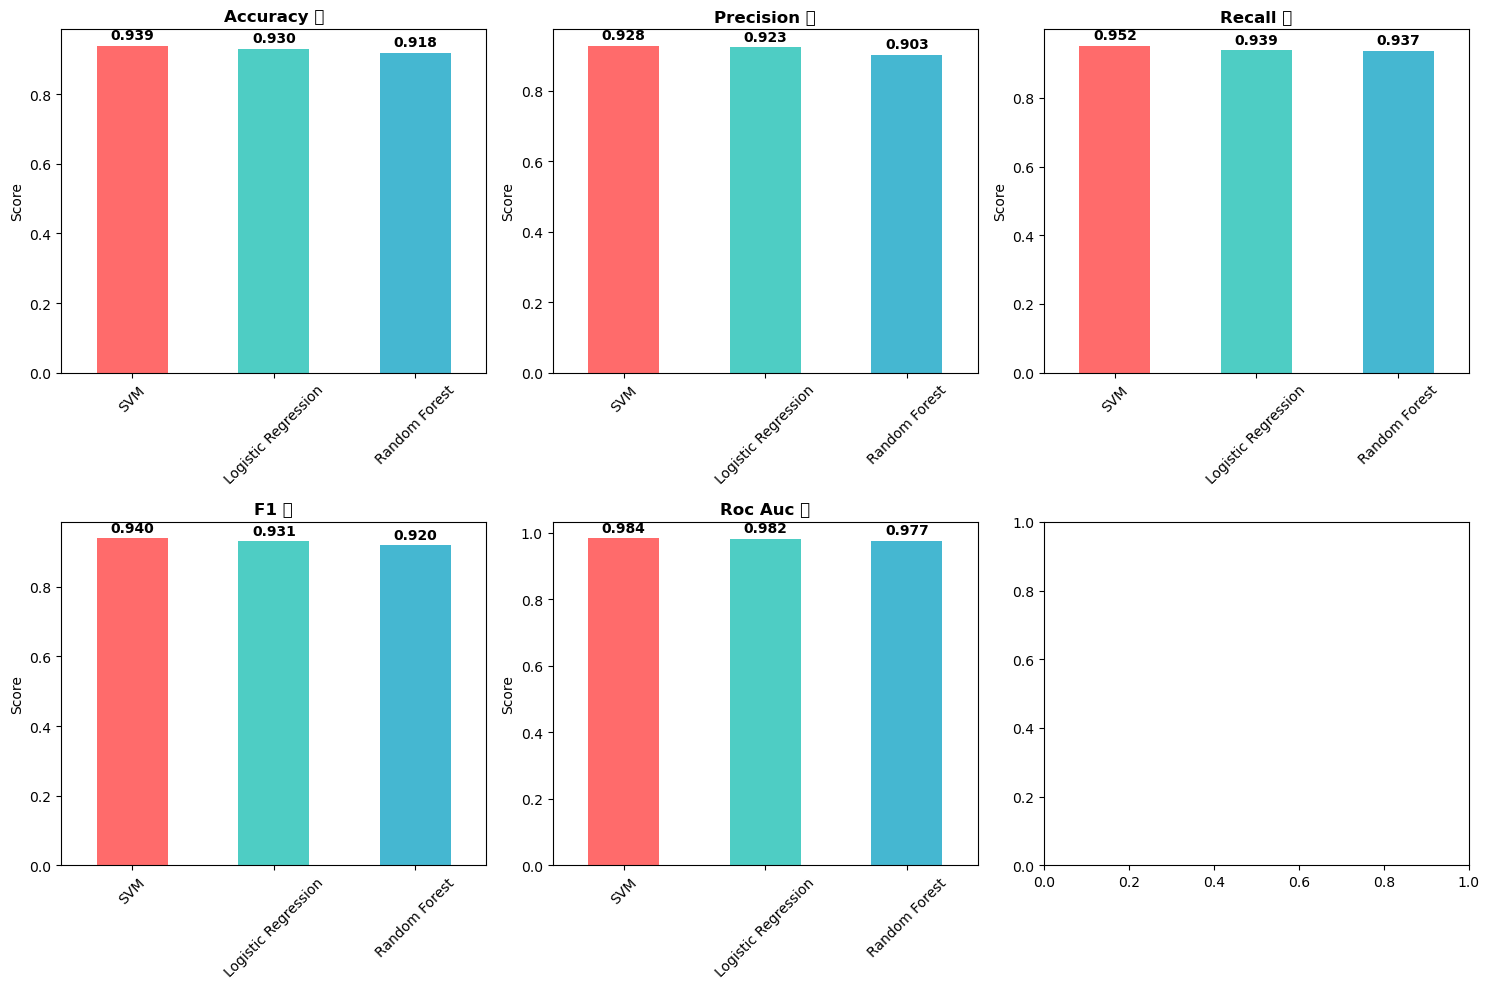

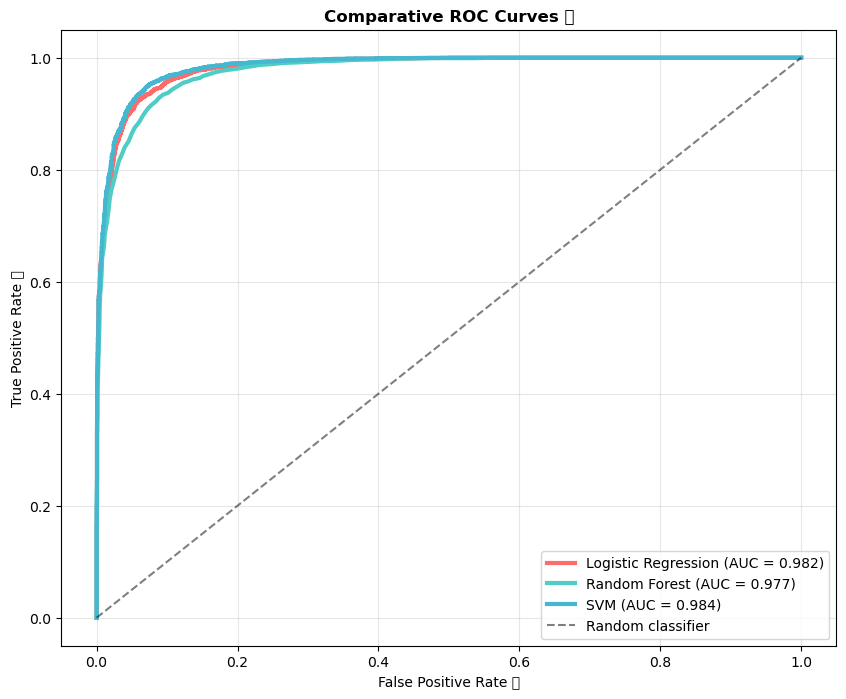

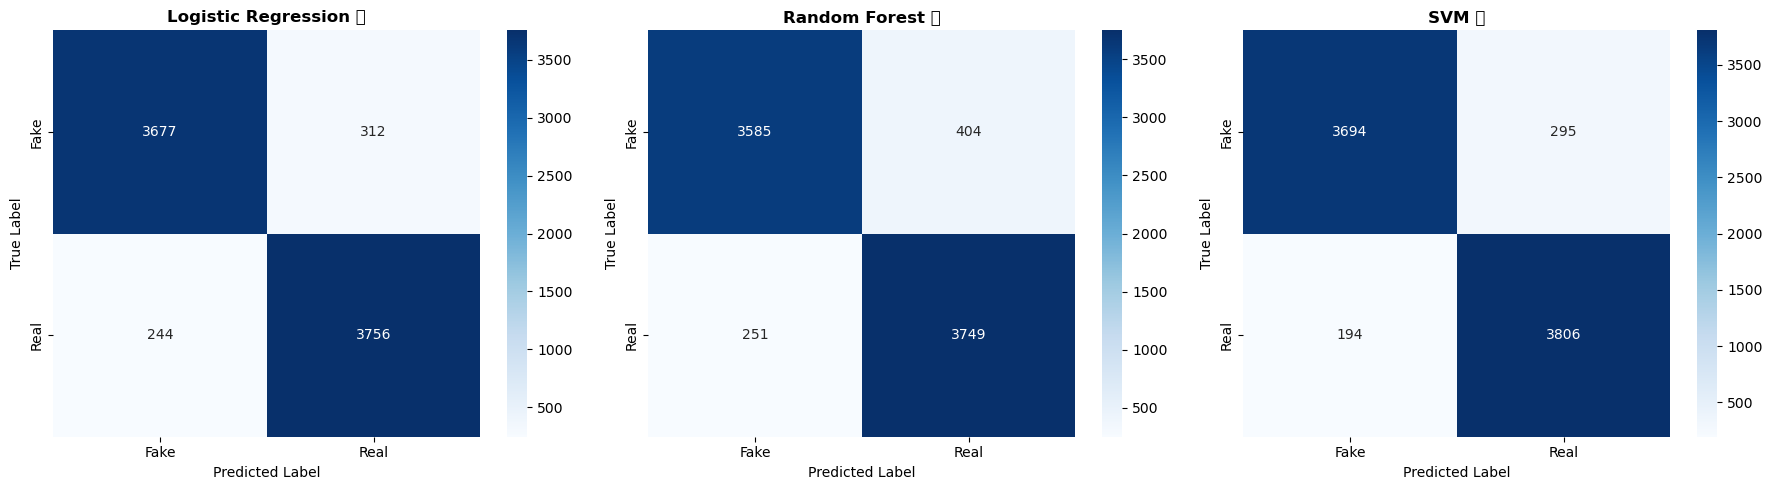

In [11]:
print("🎨 Generating advanced visualizations...")

# 1. Comparative Metrics Plot
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('roc_auc', ascending=False)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics_list = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for i, metric in enumerate(metrics_list):
    ax = axes[i//3, i%3]
    results_df[metric].plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax.set_title(f'{" ".join(metric.split("_")).title()} 📈', fontweight='bold')
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)
    for j, v in enumerate(results_df[metric]):
        ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Comparative ROC Curves
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for (name, preds), color in zip(all_predictions.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, preds['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, color=color, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random classifier')
plt.xlabel('False Positive Rate 📉')
plt.ylabel('True Positive Rate 📈')
plt.title('Comparative ROC Curves 🎯', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 3. Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, preds) in zip(axes, all_predictions.items()):
    cm = confusion_matrix(y_test, preds['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    ax.set_title(f'{name} 🎯', fontweight='bold')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

**📈  Visualize results**


In [12]:
# # Cell 6: Visualize results
# print("\n=== Final Results Comparison ===")
# results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
# results_df = results_df.sort_values('Accuracy', ascending=False)

# print(results_df)

# # Plot results
# plt.figure(figsize=(10, 6))
# results_df.plot(kind='bar', legend=False)
# plt.title('Model Performance with Sentence Transformer Embeddings')
# plt.ylabel('Accuracy')
# plt.xlabel('Model')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # Save the best model
# best_model_name = results_df.idxmax()[0]
# best_model = models[best_model_name]
# print(f"\nBest model: {best_model_name}")

# # # You can save the best model for later use
# # import joblib
# # joblib.dump(best_model, f'../models/best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
# # print("✅ Best model saved!")


---

## **🏆 7. Best Model Selection**


In [13]:
print("🏆 Selecting best model...")

# Create comprehensive results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('roc_auc', ascending=False)

print("📊 Final Results Comparison:")
print("=" * 50)
display(results_df.round(4))

# Find best model
best_model_name = results_df['roc_auc'].idxmax()
best_model = models[best_model_name]
best_metrics = results_df.loc[best_model_name]

print("🎉 BEST MODEL IDENTIFIED!")
print("=" * 50)
print(f"   🏆 Model: {best_model_name}")
print(f"   📈 ROC AUC: {best_metrics['roc_auc']:.4f}")
print(f"   ✅ Accuracy: {best_metrics['accuracy']:.4f}")
print(f"   ⚖️ F1 Score: {best_metrics['f1']:.4f}")
print(f"   🎯 Precision: {best_metrics['precision']:.4f}")
print(f"   🔍 Recall: {best_metrics['recall']:.4f}")

🏆 Selecting best model...
📊 Final Results Comparison:


,accuracy,precision,recall,f1,roc_auc
SVM,0.9388,0.9281,0.9515,0.9396,0.9842
Logistic Regression,0.9304,0.9233,0.9390,0.9311,0.9823
Random Forest,0.9180,0.9027,0.9372,0.9197,0.9770


🎉 BEST MODEL IDENTIFIED!
   🏆 Model: SVM
   📈 ROC AUC: 0.9842
   ✅ Accuracy: 0.9388
   ⚖️ F1 Score: 0.9396
   🎯 Precision: 0.9281
   🔍 Recall: 0.9515


In [14]:
print(results_df.round(4))


                     accuracy  precision  recall      f1  roc_auc
SVM                    0.9388     0.9281  0.9515  0.9396   0.9842
Logistic Regression    0.9304     0.9233  0.9390  0.9311   0.9823
Random Forest          0.9180     0.9027  0.9372  0.9197   0.9770



---

## **💾 8. Save Results**


In [15]:

print("💾 Saving results and best model...")

# Generate timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Save best model
model_filename = f'../models/best_model_{best_model_name.lower().replace(" ", "_")}_{timestamp}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved: {model_filename}")

# Save all results
results_df.to_csv(f'../models/model_comparison_{timestamp}.csv')
print(f"✅ Results saved: ../models/model_comparison_{timestamp}.csv")

# Save predictions for further analysis
predictions_df = pd.DataFrame({
    'true_label': y_test,
    **{f'{name}_pred': preds['y_pred'] for name, preds in all_predictions.items()},
    **{f'{name}_proba': preds['y_pred_proba'] for name, preds in all_predictions.items()}
})
predictions_df.to_csv(f'../models/predictions_{timestamp}.csv', index=False)
print(f"✅ Predictions saved: ../models/predictions_{timestamp}.csv")

print("\n🎉 All tasks completed successfully!")
print("📊 Next steps: Use the best model for validation data predictions!")


💾 Saving results and best model...
✅ Best model saved: ../models/best_model_svm_20250902_204149.pkl
✅ Results saved: ../models/model_comparison_20250902_204149.csv
✅ Predictions saved: ../models/predictions_20250902_204149.csv

🎉 All tasks completed successfully!
📊 Next steps: Use the best model for validation data predictions!


## **🪵 8. Log experiment results**

In [21]:
# Cell: Log experiment results
print("📊 Logging experiment results...")

from src.experiment_tracker import log_experiment

# Log results for each model
for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test_embeddings)
    y_pred_proba = model.predict_proba(X_test_embeddings)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Log experiment
    experiment_data = {
        'experiment_type': 'sentence_transformers',
        'model_name': name,
        'preprocessing': 'basic_cleaning',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'dataset': 'fake_news',
        'notes': 'Used all-MiniLM-L6-v2 embeddings'
    }
    
    log_experiment(experiment_data)

print("✅ All experiments logged!")

📊 Logging experiment results...
✅ Experiment logged: se_lr_20250902_233305
✅ Experiment logged: se_rf_20250902_233306
✅ Experiment logged: se_s_20250902_233312
✅ All experiments logged!


---

## 000 **📚  [BONUS] Test with cosine similarity examples**


🎯 BONUS: Testing semantic understanding with cosine similarity
📝 Test Sentences:
0: The president announced new policies today
1: The government introduced new regulations
2: Aliens invaded New York yesterday
3: Bigfoot seen in forest near town

📊 Cosine Similarity Matrix:
Rows/Columns correspond to the test sentences above
[[ 1.     0.513  0.066 -0.097]
 [ 0.513  1.     0.068 -0.003]
 [ 0.066  0.068  1.     0.119]
 [-0.097 -0.003  0.119  1.   ]]


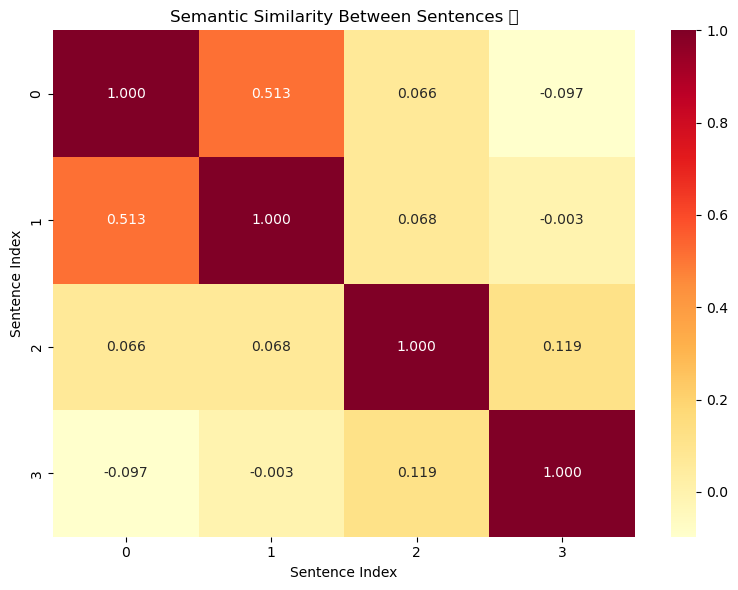


💡 Interpretation:
Values closer to 1.0 mean the sentences are semantically similar
Values closer to 0.0 mean the sentences are semantically different
This shows how the model understands the meaning of sentences!


In [16]:
# [BONUS] Test with cosine similarity examples
from sklearn.metrics.pairwise import cosine_similarity

print("🎯 BONUS: Testing semantic understanding with cosine similarity")

# Test the embeddings with some examples
test_sentences = [
    "The president announced new policies today",
    "The government introduced new regulations", 
    "Aliens invaded New York yesterday",
    "Bigfoot seen in forest near town"
]

print("📝 Test Sentences:")
for i, sent in enumerate(test_sentences):
    print(f"{i}: {sent}")

# Get embeddings for test sentences using the SentenceTransformer model (not the classifier)
test_embeddings = sentence_model.encode(test_sentences)  # Use the SentenceTransformer model, not the classifier

# Calculate similarity matrix
similarity_matrix = cosine_similarity(test_embeddings)

print("\n📊 Cosine Similarity Matrix:")
print("Rows/Columns correspond to the test sentences above")
print(similarity_matrix.round(3))

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=range(len(test_sentences)), 
            yticklabels=range(len(test_sentences)))
plt.title('Semantic Similarity Between Sentences 🔍')
plt.xlabel('Sentence Index')
plt.ylabel('Sentence Index')
plt.tight_layout()
plt.show()

# Interpret the results
print("\n💡 Interpretation:")
print("Values closer to 1.0 mean the sentences are semantically similar")
print("Values closer to 0.0 mean the sentences are semantically different")
print("This shows how the model understands the meaning of sentences!")

# Clean up
del sentence_model

In [17]:
# # Cell 11: [BONUS] Test with cosine similarity examples

# print("🎯 BONUS: Testing semantic understanding with cosine similarity")

# # Test the embeddings with some examples
# test_sentences = [
#     "The president announced new policies today",
#     "The government introduced new regulations", 
#     "Aliens invaded New York yesterday",
#     "Bigfoot seen in forest near town"
# ]

# print("📝 Test Sentences:")
# for i, sent in enumerate(test_sentences):
#     print(f"{i}: {sent}")

# # Get embeddings for test sentences using the SentenceTransformer model
# test_embeddings = sentence_model.encode(test_sentences)

# # Calculate similarity matrix
# similarity_matrix = cosine_similarity(test_embeddings)

# print("\n📊 Cosine Similarity Matrix:")
# print("Rows/Columns correspond to the test sentences above")
# print(similarity_matrix.round(3))

# # Create a heatmap for better visualization
# plt.figure(figsize=(8, 6))
# sns.heatmap(similarity_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
#             xticklabels=range(len(test_sentences)), 
#             yticklabels=range(len(test_sentences)))
# plt.title('Semantic Similarity Between Sentences 🔍')
# plt.xlabel('Sentence Index')
# plt.ylabel('Sentence Index')
# plt.tight_layout()
# plt.show()

# # Interpret the results
# print("\n💡 Interpretation:")
# print("Values closer to 1.0 mean the sentences are semantically similar")
# print("Values closer to 0.0 mean the sentences are semantically different")
# print("This shows how the model understands the meaning of sentences!")

# # Clean up
# del sentence_model

---------
## DRAFTs

In [18]:

# # Cell 2: Load basic cleaned data
# df = pd.read_csv('../data/01_interim/cleaned_data_basic.csv')
# print(f"Dataset shape: {df.shape}")

# # Prepare data
# X = df['clean_title']
# y = df['label']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )


In [19]:

 
# # Cell 3: Word2Vec Embedding
# print("Training Word2Vec model...")
# # Tokenize text
# tokenized_text = [text.split() for text in X_train]

# # Train Word2Vec
# w2v_model = Word2Vec(
#     sentences=tokenized_text,
#     vector_size=100,    # Dimension of embeddings
#     window=5,           Context window size
#     min_count=2,        # Ignore rare words
#     workers=4,
#     epochs=10
# )

# # Create sentence embeddings by averaging word vectors
# def get_sentence_embedding(text, model):
#     words = text.split()
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     if len(word_vectors) > 0:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(model.vector_size)

# # Convert text to embeddings
# X_train_w2v = np.array([get_sentence_embedding(text, w2v_model) for text in X_train])
# X_test_w2v = np.array([get_sentence_embedding(text, w2v_model) for text in X_test])
 


In [20]:
 
# # Cell 4: Train and evaluate models on Word2Vec
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Random Forest': RandomForestClassifier(n_estimators=100)
# }

# results = {}
# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train_w2v, y_train)
#     y_pred = model.predict(X_test_w2v)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[name] = accuracy
#     print(f"{name} Accuracy: {accuracy:.4f}\n")
 